In [1]:
# Libraries for reading and working with multidimensional arrays
import numpy as np
import xarray as xr
import datetime

# Libraries to assist with animation and visualisations
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
import cartopy.crs as ccrs
from IPython.display import HTML

import os, glob
from pathlib import Path

# SCRATCH

In [ ]:
file_path = '/glade/scratch/joko/cm1-iceball-5_0.4_2.0/cm1out_000073.nc'
ds = xr.open_dataset(file_path)
ds

In [ ]:
variables = ['qi1', 'qi2', 'qi3', 'qi4']
ds_qi = ds[variables]
ds_mean = ds_qi.mean(dim='yh', keep_attrs=True)
ds_mean

In [ ]:
# parse files and concatenate into single ds
import os, glob
from pathlib import Path
folder = '/glade/scratch/joko/cm1-iceball-5_0.2_1.4'
ds_list = []
for f in sorted(glob.glob(os.path.join(folder, 'cm1out_0*'))):
    ds = xr.open_dataset(f)
    variables = ['qi1', 'qi2', 'qi3', 'qi4']
    ds_qi = ds[variables]
    ds_mean = ds_qi.mean(dim='yh')
    ds_list.append(ds_mean)
    
ds = xr.concat(ds_list, dim = 'time')

ds 

In [ ]:
ds = ds.assign(qi=ds['qi1']+ds['qi2']+ds['qi3']+ds['qi4'], keep_)
ds

In [ ]:
# initialize plot
fig, ax = plt.subplots(figsize=(8, 5))
da = ds['qi']
im = plt.pcolormesh(ds.xh, ds.zh, da[35, :, :], cmap='Greys_r', alpha=0.8)
ax.set_xlabel('x [km]', fontsize=12)
ax.set_ylabel('z [km]', fontsize=12)
cbar = plt.colorbar(im, fraction=0.05, pad=0.04)
cbar.set_label(f'mixing ratio [kg/kg]')

In [ ]:
# create function that will be called by animation object
frames = 63
def animate(i):
    array = da[i, :, :].values
    im.set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax.set_title(f'Ice Mixing Ratio [kg/kg], {str(seconds)} seconds', fontsize=12)

In [ ]:
# create animation object
ani = animation.FuncAnimation(fig, animate, frames, interval=150)
HTML(ani.to_jshtml())

# Create cross-section averaged animations

In [2]:
# get directories 
dir_prefix = 'cm1-iceball-5'
run_dir = '/glade/scratch/joko'
ds_dict = {}
for root, dirs, files in os.walk(run_dir):
    for d in dirs:
        if d.startswith(dir_prefix):
            exp_path = os.path.join(run_dir, d)
            print(f'=== {exp_path} ===')
            # parse files and concatenate into single ds
            ds_list = []
            for f in sorted(glob.glob(os.path.join(exp_path, 'cm1out_0*'))):
                print(f'   === {f} ===')
                ds = xr.open_dataset(f)
                variables = ['qi1', 'qi2', 'qi3', 'qi4']
                ds_qi = ds[variables]
                ds_temp = ds_qi.assign(qi = ds_qi['qi1'] + ds_qi['qi2'] + 
                                       ds_qi['qi3'] + ds_qi['qi4'])
                ds_mean = ds_temp.mean(dim='yh')
                ds_list.append(ds_mean)

            ds = xr.concat(ds_list, dim = 'time')
            ds_dict[d] = ds

=== /glade/scratch/joko/cm1-iceball-5_0.2_1.4 ===
   === /glade/scratch/joko/cm1-iceball-5_0.2_1.4/cm1out_000001.nc ===
   === /glade/scratch/joko/cm1-iceball-5_0.2_1.4/cm1out_000002.nc ===
   === /glade/scratch/joko/cm1-iceball-5_0.2_1.4/cm1out_000003.nc ===
   === /glade/scratch/joko/cm1-iceball-5_0.2_1.4/cm1out_000004.nc ===
   === /glade/scratch/joko/cm1-iceball-5_0.2_1.4/cm1out_000005.nc ===
   === /glade/scratch/joko/cm1-iceball-5_0.2_1.4/cm1out_000006.nc ===
   === /glade/scratch/joko/cm1-iceball-5_0.2_1.4/cm1out_000007.nc ===
   === /glade/scratch/joko/cm1-iceball-5_0.2_1.4/cm1out_000008.nc ===
   === /glade/scratch/joko/cm1-iceball-5_0.2_1.4/cm1out_000009.nc ===
   === /glade/scratch/joko/cm1-iceball-5_0.2_1.4/cm1out_000010.nc ===
   === /glade/scratch/joko/cm1-iceball-5_0.2_1.4/cm1out_000011.nc ===
   === /glade/scratch/joko/cm1-iceball-5_0.2_1.4/cm1out_000012.nc ===
   === /glade/scratch/joko/cm1-iceball-5_0.2_1.4/cm1out_000013.nc ===
   === /glade/scratch/joko/cm1-iceball-5

In [3]:
ds_dict.keys()

dict_keys(['cm1-iceball-5_0.2_1.4', 'cm1-iceball-5_0.4_1.4', 'cm1-iceball-5_0.2_2.0', 'cm1-iceball-5_0.4_2.0'])

In [4]:
# create total qi data variables for each ds
for key in ds_dict.keys():
    temp = ds_dict[key]
    print(temp.keys())

KeysView(<xarray.Dataset>
Dimensions:  (time: 73, zh: 280, xh: 256)
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 00:05:00 ... 05:55:00 06:00:00
  * xh       (xh) float32 0.025 0.075 0.125 0.175 ... 12.63 12.68 12.73 12.78
  * zh       (zh) float32 0.025 0.075 0.125 0.175 ... 13.83 13.88 13.93 13.98
Data variables:
    qi1      (time, zh, xh) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    qi2      (time, zh, xh) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    qi3      (time, zh, xh) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    qi4      (time, zh, xh) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    qi       (time, zh, xh) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0)
KeysView(<xarray.Dataset>
Dimensions:  (time: 73, zh: 280, xh: 256)
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 00:05:00 ... 05:55:00 06:00:00
  * xh       (xh) float32 0.025 0.075 0.125 0.175 ... 12.63 12.68 12.73 12.78
  * zh       (zh) float32 0.025 0.0

In [5]:
ds_dict['cm1-iceball-5_0.2_1.4']

<xarray.Dataset>
Dimensions:  (time: 73, zh: 280, xh: 256)
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 00:05:00 ... 05:55:00 06:00:00
  * xh       (xh) float32 0.025 0.075 0.125 0.175 ... 12.63 12.68 12.73 12.78
  * zh       (zh) float32 0.025 0.075 0.125 0.175 ... 13.83 13.88 13.93 13.98
Data variables:
    qi1      (time, zh, xh) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    qi2      (time, zh, xh) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    qi3      (time, zh, xh) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    qi4      (time, zh, xh) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    qi       (time, zh, xh) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [6]:
# find absolute max across all experiments
qmax = 0 
for key in ds_dict.keys():
    ds = ds_dict[key]
    qmax_local = ds['qi'].max().item()
    if qmax_local > qmax:
        qmax = qmax_local
print(qmax)

7.459537300746888e-05


In [7]:
round(qmax)

0

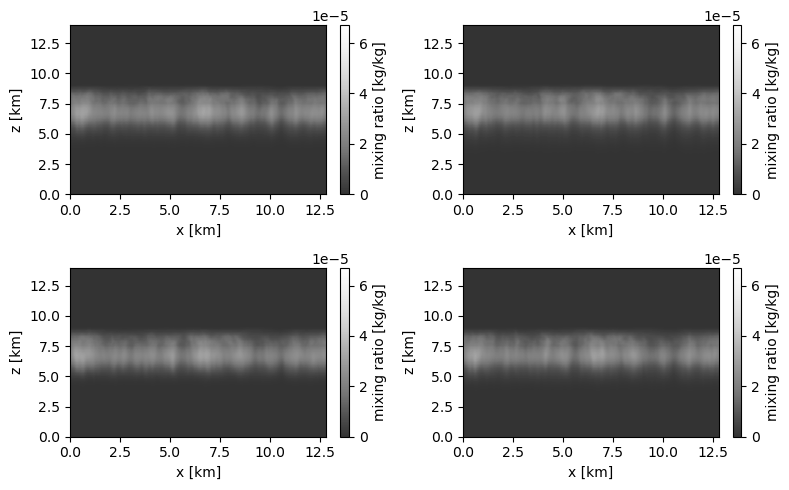

In [9]:
# initialize gridded plot
import matplotlib.ticker
fig, ax_grid = plt.subplots(2, 2, figsize=(8, 5))
var_list = ds_dict.keys()
cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
cbformat.set_powerlimits((-2,2)) 
counter = 0 
im_list = [] 
for i in range(2):
    for j in range(2):
        ax = ax_grid[i, j]
        exp_name = list(var_list)[counter]
        ds = ds_dict[exp_name]
        da = ds['qi']
        im = ax.pcolormesh(ds.xh, ds.zh, da[35, :, :], cmap='Greys_r', alpha=0.8)
        im_list.append(im)
        im.set_clim(0, 0.9*qmax)
        ax.set_xlabel('x [km]', fontsize=10)
        ax.set_ylabel('z [km]', fontsize=10)
        cbar = plt.colorbar(im, ax=ax, fraction=0.05, pad=0.05, format=cbformat)
        cbar.set_label('mixing ratio [kg/kg]')
        counter += 1
fig.tight_layout()

In [10]:
grid_pos = {0: (0,0),
            1: (0,1),
            2: (1,0),
            3: (1,1)}
grid_pos[0]

(0, 0)

In [11]:
# create function that will be called by animation object
frames = 63
def animate(i):
    counter = 0
    grid_pos = {0: (0,0),
                1: (0,1),
                2: (1,0),
                3: (1,1)}
    for exp_name in list(var_list):
        ds = ds_dict[exp_name]
        da = ds['qi']
        array = da[i, :, :].values
        im_list[counter].set_array(array.flatten())
        seconds = da.time[i].values / np.timedelta64(1, 's')
        ax_grid[grid_pos[counter][0],grid_pos[counter][1]].set_title(f'{exp_name}, {str(seconds)} seconds', fontsize=8)
        counter += 1

In [12]:
# create animation object
save_dir = '/glade/u/home/joko'
ani = animation.FuncAnimation(fig, animate, frames, interval=150)
HTML(ani.to_jshtml())
ani.save(f'{save_dir}/iceball_ppe_test_mass_mixing_ratio.gif') # save as gif

In [13]:
HTML(ani.to_jshtml())

# Class 1: Planar

In [ ]:
# initialize plot
fig, ax = plt.subplots(figsize=(8, 5))
da = ds_subset['qi1']
im = plt.pcolormesh(ds_qi.xh, ds_qi.zh, da[20, :, :], cmap='Greys_r', alpha=0.8)
ax.set_xlabel('x [km]', fontsize=12)
ax.set_ylabel('z [km]', fontsize=12)
cbar = plt.colorbar(im, fraction=0.05, pad=0.04)
cbar.set_label('mixing ratio [kg/kg]')

In [ ]:
# create function that will be called by animation object
frames = 39
def animate(i):
    array = da[i, :, :].values
    im.set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax.set_title(f'Planar Ice Mixing Ratio [kg/kg], {str(seconds)} seconds', fontsize=12)

In [ ]:
# create animation object
ani = animation.FuncAnimation(fig, animate, frames, interval=150)

In [ ]:
# display w/ Javascript
HTML(ani.to_jshtml())

In [ ]:
save_dir = '/glade/u/home/joko'
ani.save(f'{save_dir}/iceball_bulk_les_planar.gif') # save as gif

# Class 2: columns

In [ ]:
# initialize plot
fig, ax = plt.subplots(figsize=(8, 5))
# da = ds_subset['qi2']
data_var = dvar + str(2)
da = ds[data_var]
im = plt.pcolormesh(ds_qi.xh, ds_qi.zh, da[20, :, :], cmap='Greys_r', alpha=0.8)
ax.set_xlabel('x [km]', fontsize=12)
ax.set_ylabel('z [km]', fontsize=12)
cbar = plt.colorbar(im, fraction=0.05, pad=0.04)
cbar.set_label(f'mixing ratio [{da.units}]')

In [ ]:
# create function that will be called by animation object
frames = 63
def animate(i):
    array = da[i, :, :].values
    im.set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax.set_title(f'Columnar Ice Mixing Ratio [{da.units}], {str(seconds)} seconds', fontsize=12)

In [ ]:
# create animation object
ani = animation.FuncAnimation(fig, animate, frames, interval=150)
HTML(ani.to_jshtml())

In [ ]:
ani.save(f'{save_dir}/iceball_bulk_les_columnar.gif') # save as gif

# Class 3: Aggregates

In [ ]:
# initialize plot
fig, ax = plt.subplots(figsize=(8, 5))
da = ds_subset['qi3']
im = plt.pcolormesh(ds_qi.xh, ds_qi.zh, da[20, :, :], cmap='Greys_r', alpha=0.8)
ax.set_xlabel('x [km]', fontsize=12)
ax.set_ylabel('z [km]', fontsize=12)
cbar = plt.colorbar(im, fraction=0.05, pad=0.04)
cbar.set_label('mixing ratio [kg/kg]')

In [ ]:
# create function that will be called by animation object
frames = 39
def animate(i):
    array = da[i, :, :].values
    im.set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax.set_title(f'Aggregate Ice Mixing Ratio [kg/kg], {str(seconds)} seconds', fontsize=12)

In [ ]:
# create animation object
ani = animation.FuncAnimation(fig, animate, frames, interval=150)
HTML(ani.to_jshtml())

In [ ]:
ani.save(f'{save_dir}/iceball_bulk_les_agg.gif') # save as gif

# Class 4: Polycrystals

In [ ]:
# initialize plot
fig, ax = plt.subplots(figsize=(8, 5))
# da = ds_subset['qi4']
data_var = dvar + str(4)
da = ds[data_var]
im = plt.pcolormesh(ds_qi.xh, ds_qi.zh, da[20, :, :], cmap='Greys_r', alpha=0.8)
ax.set_xlabel('x [km]', fontsize=12)
ax.set_ylabel('z [km]', fontsize=12)
cbar = plt.colorbar(im, fraction=0.05, pad=0.04)
cbar.set_label(f'mixing ratio [{da.units}]')

In [ ]:
# create function that will be called by animation object
frames = 63
def animate(i):
    array = da[i, :, :].values
    im.set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax.set_title(f'Polycrystal Ice Mixing Ratio [{da.units}], {str(seconds)} seconds', fontsize=12)

In [ ]:
# create animation object
ani = animation.FuncAnimation(fig, animate, frames, interval=150)
HTML(ani.to_jshtml())

In [ ]:
ani.save(f'{save_dir}/iceball_bulk_les_poly.gif') # save as gif

# Gridded GIF

In [ ]:
# initialize plot
import matplotlib.ticker
fig, ax_grid = plt.subplots(2, 2, figsize=(8, 5))
# da = ds_subset['qi3']
# im = plt.pcolormesh(ds_qi.xh, ds_qi.zh, da[20, :, :], cmap='Greys_r', alpha=0.8)
var_list = ['qi1', 'qi2', 'qi3', 'qi4']
cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
cbformat.set_powerlimits((-2,2)) 
counter = 0 
im_list = [] 
for i in range(2):
    for j in range(2):
        ax = ax_grid[i, j]
        variable = var_list[counter]
        da = ds_subset[variable]
        im = ax.pcolormesh(ds_qi.xh, ds_qi.zh, da[20, :, :], cmap='Greys_r', alpha=0.8)
        im_list.append(im)
        ax.set_xlabel('x [km]', fontsize=10)
        ax.set_ylabel('z [km]', fontsize=10)
        cbar = plt.colorbar(im, ax=ax, fraction=0.05, pad=0.05, format=cbformat)
        cbar.set_label('mixing ratio [kg/kg]')
        counter += 1
fig.tight_layout()

In [ ]:
# create function that will be called by animation object
frames = 39
def animate(i):
    # qi1 
    da = ds['qi1']
    array = da[i, :, :].values
    im_list[0].set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax_grid[0,0].set_title(f'Planar, {str(seconds)} seconds', fontsize=8)
    
    # qi2 
    da = ds['qi2']
    array = da[i, :, :].values
    im_list[1].set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax_grid[0,1].set_title(f'Columnar, {str(seconds)} seconds', fontsize=8)
    
    # qi13
    da = ds['qi3']
    array = da[i, :, :].values
    im_list[2].set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax_grid[1,0].set_title(f'Aggregate, {str(seconds)} seconds', fontsize=8)
    
    # qi4 
    da = ds['qi4']
    array = da[i, :, :].values
    im_list[3].set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax_grid[1,1].set_title(f'Polycrystal, {str(seconds)} seconds', fontsize=8)

In [ ]:
# create animation object
save_dir = '/glade/u/home/joko'
ani = animation.FuncAnimation(fig, animate, frames, interval=150)
# HTML(ani.to_jshtml())
ani.save(f'{save_dir}/iceball_bulk_les_grid.gif') # save as gif